# Load Dataset

In [1]:
from google.colab import drive
# drive.mount('/content/drive')
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
studentVle = pd.read_csv("drive/My Drive/dataset/anonymisedData/studentVle.csv")
vle        = pd.read_csv("drive/My Drive/dataset/anonymisedData/vle.csv")

# EDA

In [4]:
studentVle

,code_module,code_presentation,id_student,id_site,date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1
2,AAA,2013J,28400,546652,-10,1
3,AAA,2013J,28400,546614,-10,11
4,AAA,2013J,28400,546714,-10,1
...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3
10655276,GGG,2014J,675578,896943,269,1
10655277,GGG,2014J,654064,896943,269,3
10655278,GGG,2014J,654064,896939,269,1


In [5]:
studentVle.shape

(10655280, 6)

In [6]:
studentVle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10655280 entries, 0 to 10655279
Data columns (total 6 columns):
 #   Column             Dtype 
---  ------             ----- 
 0   code_module        object
 1   code_presentation  object
 2   id_student         int64 
 3   id_site            int64 
 4   date               int64 
 5   sum_click          int64 
dtypes: int64(4), object(2)
memory usage: 487.8+ MB


In [7]:
studentVle.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id_student,10655280.0,733333.566872,582705.982511,6516.0,507743.0,588236.0,646484.0,2698588.0
id_site,10655280.0,738323.416400,131219.622162,526721.0,673519.0,730069.0,877030.0,1049562.0
date,10655280.0,95.174000,76.071301,-25.0,25.0,86.0,156.0,269.0
sum_click,10655280.0,3.716946,8.849047,1.0,1.0,2.0,3.0,6977.0


In [8]:
vle

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN
2,546998,AAA,2013J,resource,NaN,NaN
3,546888,AAA,2013J,url,NaN,NaN
4,547035,AAA,2013J,resource,NaN,NaN
...,...,...,...,...,...,...
6359,897063,GGG,2014J,resource,NaN,NaN
6360,897109,GGG,2014J,resource,NaN,NaN
6361,896965,GGG,2014J,oucontent,NaN,NaN
6362,897060,GGG,2014J,resource,NaN,NaN


In [9]:
vle.shape

(6364, 6)

In [10]:
vle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6364 entries, 0 to 6363
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_site            6364 non-null   int64  
 1   code_module        6364 non-null   object 
 2   code_presentation  6364 non-null   object 
 3   activity_type      6364 non-null   object 
 4   week_from          1121 non-null   float64
 5   week_to            1121 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 298.4+ KB


In [11]:
vle.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id_site,6364.0,726099.094123,128315.137473,526721.0,661592.75,730096.5,814016.25,1077905.0
week_from,1121.0,15.204282,8.792865,0.0,8.00,15.0,22.00,29.0
week_to,1121.0,15.214987,8.779806,0.0,8.00,15.0,22.00,29.0


# Integrasi Data

Entitas yang dipakai adalah studentVle dan vle

In [12]:
# Merge studentVle dan vle
studentVle_vle_merged = pd.merge(studentVle, vle, on=['id_site', 'code_module', 'code_presentation'], how = 'left')
studentVle_vle_merged

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type,week_from,week_to
0,AAA,2013J,28400,546652,-10,4,forumng,NaN,NaN
1,AAA,2013J,28400,546652,-10,1,forumng,NaN,NaN
2,AAA,2013J,28400,546652,-10,1,forumng,NaN,NaN
3,AAA,2013J,28400,546614,-10,11,homepage,NaN,NaN
4,AAA,2013J,28400,546714,-10,1,oucontent,NaN,NaN
...,...,...,...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3,homepage,NaN,NaN
10655276,GGG,2014J,675578,896943,269,1,homepage,NaN,NaN
10655277,GGG,2014J,654064,896943,269,3,homepage,NaN,NaN
10655278,GGG,2014J,654064,896939,269,1,forumng,NaN,NaN


In [13]:
studentVle_vle_merged.shape

(10655280, 9)

# Pre Processing

In [14]:
studentVle_vle_merged = studentVle_vle_merged.drop(['week_from', 'week_to'], axis=1)
studentVle_vle_merged

,code_module,code_presentation,id_student,id_site,date,sum_click,activity_type
0,AAA,2013J,28400,546652,-10,4,forumng
1,AAA,2013J,28400,546652,-10,1,forumng
2,AAA,2013J,28400,546652,-10,1,forumng
3,AAA,2013J,28400,546614,-10,11,homepage
4,AAA,2013J,28400,546714,-10,1,oucontent
...,...,...,...,...,...,...,...
10655275,GGG,2014J,675811,896943,269,3,homepage
10655276,GGG,2014J,675578,896943,269,1,homepage
10655277,GGG,2014J,654064,896943,269,3,homepage
10655278,GGG,2014J,654064,896939,269,1,forumng


In [15]:
studentVle_vle_merged.isnull().sum()

code_module          0
code_presentation    0
id_student           0
id_site              0
date                 0
sum_click            0
activity_type        0
dtype: int64

In [16]:
studentVle_vle_merged.duplicated().sum()

787170

In [17]:
studentVle_vle_merged = studentVle_vle_merged.drop_duplicates()
studentVle_vle_merged.shape

(9868110, 7)

# Data Analysis

Tujuan dari merge entitas studentVle dan vle adalah untuk melihat activity_type pada code_module terhadap sum_click

In [18]:
studentVle_vle_merged_group = studentVle_vle_merged.groupby(['code_module', 'activity_type'])['sum_click'].sum().reset_index()
studentVle_vle_merged_group.head()

,code_module,activity_type,sum_click
0,AAA,dataplus,3378
1,AAA,forumng,311412
2,AAA,glossary,656
3,AAA,homepage,266720
4,AAA,oucollaborate,475


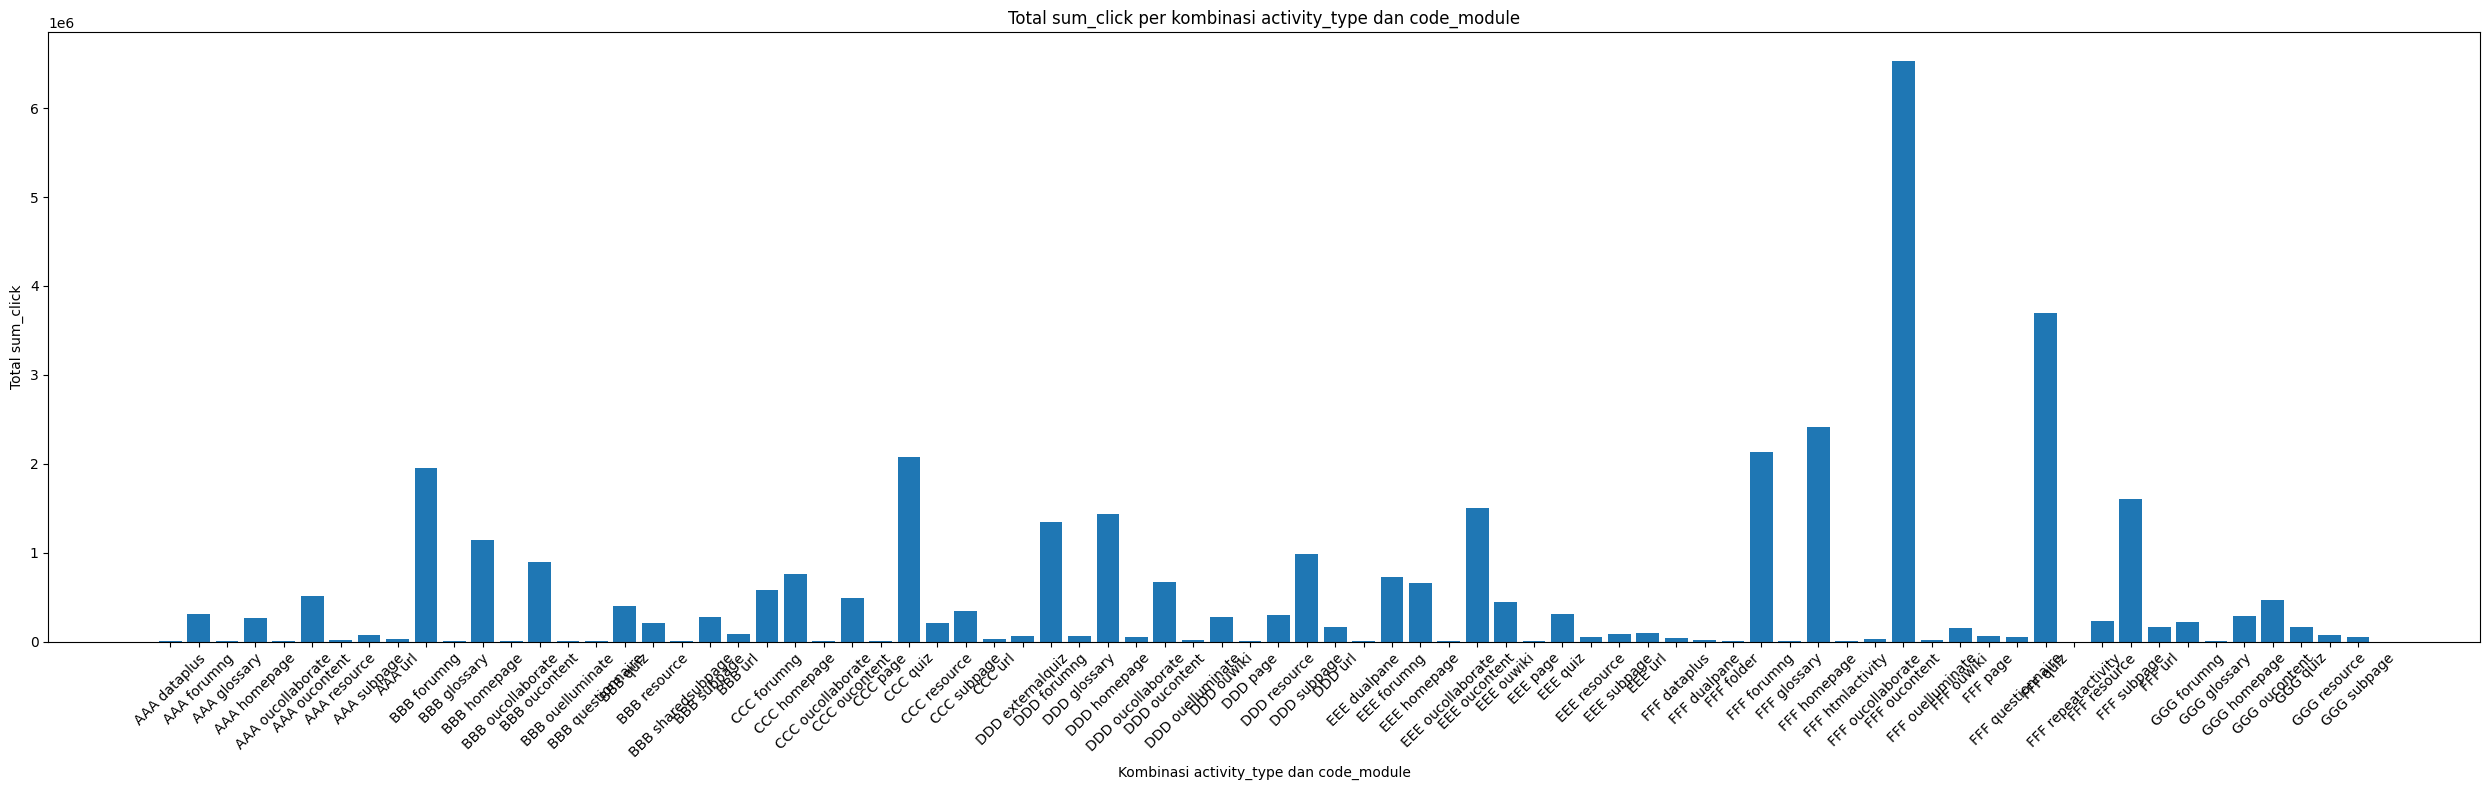

In [20]:
plt.figure(figsize=(25, 8))
plt.bar(range(len(studentVle_vle_merged_group)), studentVle_vle_merged_group['sum_click'])
plt.xlabel('Kombinasi activity_type dan code_module')
plt.ylabel('Total sum_click')
plt.title('Total sum_click per kombinasi activity_type dan code_module')
plt.xticks(range(len(studentVle_vle_merged_group)), studentVle_vle_merged_group['code_module'] + ' ' + studentVle_vle_merged_group['activity_type'], rotation=45)
plt.tight_layout()

plt.show()